In [58]:
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
# Want to add more centroid_choices and interation end condition
def hard_k_means_cluster(k, data, N):
    """Function to impliment k-means clustering with k clusters on a 2d numpy array of data, formatted such that 
    each row is a single c-dimensional data point, where c is the number of columns"""
    num_rows = data.shape[0]
    num_cols = data.shape[1]
    
    best_total_sqr_dist = -1
    best_cluster_centroids = np.ones((k, num_cols))
    best_cluster_labels = -1
    
    min_max_list = []
    cluster_trial_sqr_dist_list = []
    
    # Get the min and max of data dimension
    for c in range(num_cols):
        min_max_list.append((data[:,c].min(), data[:,c].max()))
    
    # change this to a while loop and only count iterations with 8 clusters 
    for clustering_trial in range(N):
        # Initiate random centroids
        centroids = np.ones((k, num_cols))
        cluster_labels = -1

        # Create k random centroids with dimension values within the range of each data dimension
        for r in range(k):
            for c in range(num_cols):
                centroids[r,c] = random.uniform(min_max_list[c][0],min_max_list[c][1])   
                    
        # Create a list to keep track of the distances
        iteration_sqr_dist_list = []
        iteration = 0
        for iteration in range(20):
            
            ### Update the clusters###

            # Initiate an array where each index holds the new cluster identity of the data at the correspoinding row
            # index
            new_clusters = np.ones(num_rows, dtype=int)
        
            
            # Iterate over each row of the data
            for r in range(num_rows):
                # Get the identity closest centroid to data vector r
                centroid_dists = [distance.euclidean(i,data[r,:]) for i in centroids]
                closest_centroid = np.argmin(centroid_dists)

                # Add the centroid indentity to the array new_clusters
                new_clusters[r] = closest_centroid

            ### Update the centroid values###

            for idx, cluster in enumerate(new_clusters):
                # get all the points belonging to that cluster
                cluster_data_idx = (new_clusters == cluster)
                cluster_data = data[cluster_data_idx,:]
                
                # set the centroid equal to the mean of that cluster
                if len(centroids[cluster,:]) != 0:
                    centroids[cluster,:] = np.mean(cluster_data, axis=0)
                else: centroids[cluster,:] =  data[np.random.choice(num_rows,size=1), :]     
           
            cluster_labels = new_clusters
        
        # If a cluster has no labels, do not update
        if len(np.unique(cluster_labels)) == 8:
            total_sqr_dist = 0
            test = 0

            for centroid_idx, centroid in enumerate(centroids):
                for r_idx in range(num_rows):
                    if cluster_labels[r_idx] == centroid_idx:
                        total_sqr_dist += distance.euclidean(data[r_idx,:], centroid)**2
                        print(distance.euclidean(data[r_idx,:], centroid)**2)
                        test+=1
    #         cluster_trial_total_sqr_dist = sum([np.sqrt(distance.euclidean(centroids[i], clustered_data[i][r])) for i in range(k) 
    #                                             for r in range(len(clustered_data[i]))])**2
            cluster_trial_sqr_dist_list.append(total_sqr_dist)

            # Check to see if this run had a lower total squared distance and update the best values if it did            
            if (cluster_trial_sqr_dist_list[-1] < best_total_sqr_dist) or (best_total_sqr_dist == -1):
                best_total_sqr_dist = cluster_trial_sqr_dist_list[-1]
                best_cluster_centroids = centroids
                best_cluster_labels = cluster_labels

    return best_cluster_centroids, best_cluster_labels, best_total_sqr_dist, cluster_trial_sqr_dist_list


In [3]:
# This is giving me a very low total squared distance...
data = pd.read_csv("w10-data.tbl", delim_whitespace=True)
log_data_arr = np.log(data.values)
centroids, cluster_labels, sqr_dist, test = hard_k_means_cluster(8, log_data_arr, 15)

epoch
441.17898655067825
458.65140505941343
467.16496836307203
462.67887400915384
464.8226354222743
442.069088945063
489.32453219094657
462.46654680424786
457.5103938518139
456.33283460895177
472.28552548085395
453.53538538987306
450.8838940856797
456.36717150524964
444.5830920535761
457.6722316061155
440.42060510642
447.53343436308137
449.17238023254276
460.9267419188621
444.2096607574519
447.1273263326179
434.2293395106934
444.2323129770585
450.9170486835939
463.2078135202609
453.39810781505764
450.3593053864259
440.1590923943293
444.53404356934647
476.2379897077746
454.1329280376002
449.320610708309
471.5416499663178
482.57005754334205
437.0854218289444
420.8300186309363
433.9659201570015
430.08373144847127
476.23943704108245
428.4073246358258
461.0414522970409
441.37838587682046
438.36626404167043
452.45944332147235
447.84452618993686
449.028098437501
421.07232970878954
448.8834321107292
464.785893030085
462.94545584148284
446.2716640069421
460.9642303926302
426.31027121708405
436.

epoch
epoch
epoch
epoch
0.0
428.97285186526665
448.6806866118141
460.21932301796534
429.751393178174
420.4300976033883
420.54822141223497
435.92046040225557
398.44744679975713
444.5292684905938
388.98163622775036
398.46178139274224
436.43444660475126
409.89968154415124
467.11904129742663
445.0886654617404
458.912825262203
465.22977628301896
427.88577917489613
454.71722639942715
459.7949877255418
456.04909629917165
441.89506483377886
490.2035901177693
452.7942462702072
468.0451449697198
516.8437646474044
448.14523712474545
456.11386893584734
446.3824688451575
450.01310546294746
445.62755516551965
458.3310456187845
452.4412263041267
429.9817416230074
433.3593892264431
439.7977945724759
450.052536447226
450.92243897601327
472.85727869330776
434.60702088204937
499.1629680070116
449.4471414391863
444.55041942872447
461.46078129828464
456.6959023326449
440.01783244968044
451.12589217311006
473.6842045556744
454.864485014027
448.8882465534739
474.37802947069775
481.71744352100006
441.11208435

epoch
0.0
442.11506219011005
471.15533226265353
444.63019022586195
476.1778286742675
427.53956457279037
443.88620026123624
466.84198208857634
470.6432817122573
444.31093287172916
471.6262896869194
444.36465656049893
468.0617061997737
435.66514623598306
435.0667656400917
436.1163860641681
463.67682862780856
449.73658818310753
440.17240903724235
450.7487305930164
424.51960774252393
440.4225345030912
440.2739643519646
471.3488946282666
435.4884745307853
483.76655133104225
455.4170539876774
477.5957135410822
467.6320292095412
450.0290131159747
477.2166361297348
418.2377074119167
448.0807057650584
498.8981092269169
465.1437044112429
483.30779974802505
453.3195625444346
477.05015018961683
427.27337425437304
456.76867147505675
457.11024246296296
444.02550125982634
500.4786260140926
446.8075152199052
460.93670531392894
451.5060798243306
465.45237496368753
442.5012930798351
461.4205414287158
451.9572604201943
417.85663197283037
411.5349572972627
484.0816726016085
445.6412998871118
461.528092001

In [4]:
test

[88352.75787366896,
 88532.09751204074,
 88766.72014072054,
 88718.67154788814,
 88092.91166775388,
 88064.68154413605,
 88775.89175779396,
 88966.72714599743]

In [5]:
sqr_dist

88064.68154413605

In [67]:
def PCA(data_arr, n):
    """Takes in a non-standardized data array and performs PCA using SVD method. Data should be in tidy format,
    with rows as observations and columns as variables"""
    num_rows = data_arr.shape[0]
    # Center the data
    X_star = data_arr-np.mean(data_arr, axis=0)
    
    # Do SVD
    U, S, V_T = linalg.svd(X_star)
    print(X_star.shape)
    print(U.shape)
    print(S.shape)
    print(V_T.shape)
    V = np.transpose(V_T)
    eigenvalues = np.divide(np.square(S), num_rows-1)
    
    # Get the data projected into the number of PCA components specified
    PCA_data = np.matmul(X_star, V[:,0:(n+1)])
    
    return PCA_data, V, S, eigenvalues

def PCA_plots(PCA_data, eig_vectors, eig_vals, labels):
    """Creates a biplot for the PCA data in 2d, plus a scree plot of the varaition captured by each principle
    component"""
    #TODO add lables for both plots
    
    ### Plot the biplot ###
    PC1 = PCA_data[:,0]
    PC2 = PCA_data[:,1]
    num_dims = PCA_data.shape[0]
    
    x_scale = np.true_divide(1,(max(PC1) - min(PC1)))
    y_scale = np.true_divide(1,(max(PC2) - min(PC2)))
    eig_vectors_weight = [np.linalg.norm(eig_vectors[i,0:2]) for i in range(num_dims)]
    eig_vectors_weight = np.true_divide(eig_vectors_weight, sum(eig_vectors_weight))
    
    plt.figure(1, figsize=(10,10))
    plt.scatter(PC1*x_scale, PC2*y_scale)
    
    for i in range(num_dims):
        plt.arrow(0, 0, eig_vectors[i,0], eig_vectors[i,1])
        if labels != None:
            if eig_vectors_weight[i] > 0.05:
                plt.text(eig_vectors[i,0]* 1.15, eig_vectors[i,1] * 1.15, labels[i], color = 'r',
                         ha = 'center', va = 'center')
            
    ### Plot the scree plot ###
    plt.figure(2, figsize=(10,10))
    plt.plot(eig_vals)
    
def plot_clusters(data, cluster_labels, centroids):
    #TODO add labels for plots
    
    plt.figure(figsize=(10,10))
    clusters = np.unique(cluster_labels)
    
    for cluster in clusters:
        plot_data_idx = (cluster_labels == cluster)
        plot_data = data[plot_data_idx,:]
        plt.scatter(plot_data[:,0], plot_data[:,1], marker='o', alpha=0.8)
    
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='k')
    
    return None

(200, 2001)
(200, 200)
(200,)
(2001, 2001)


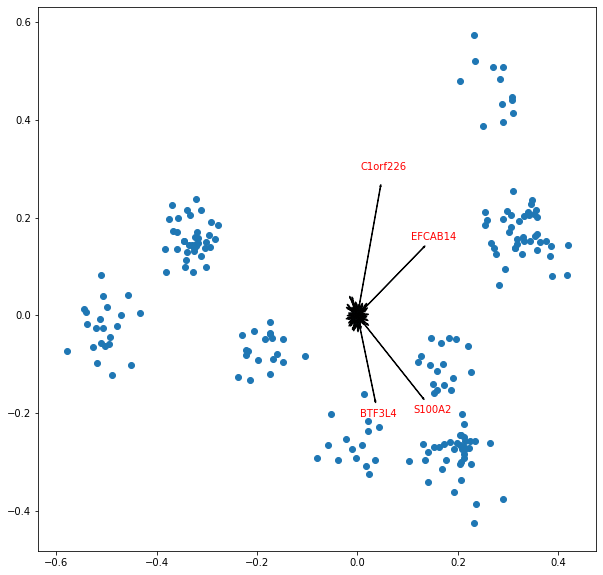

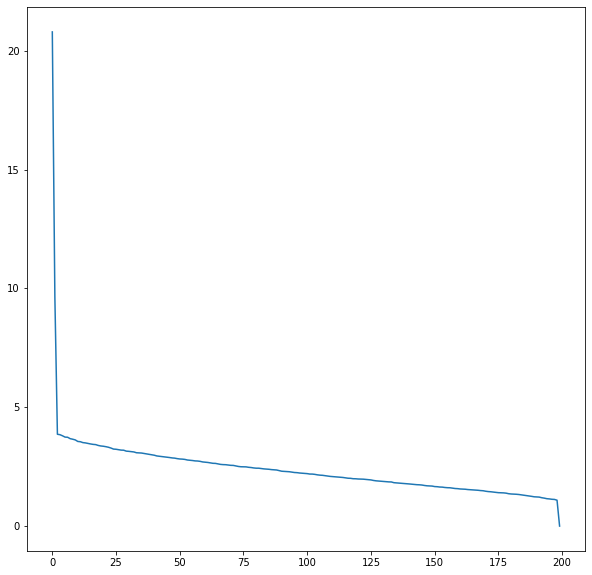

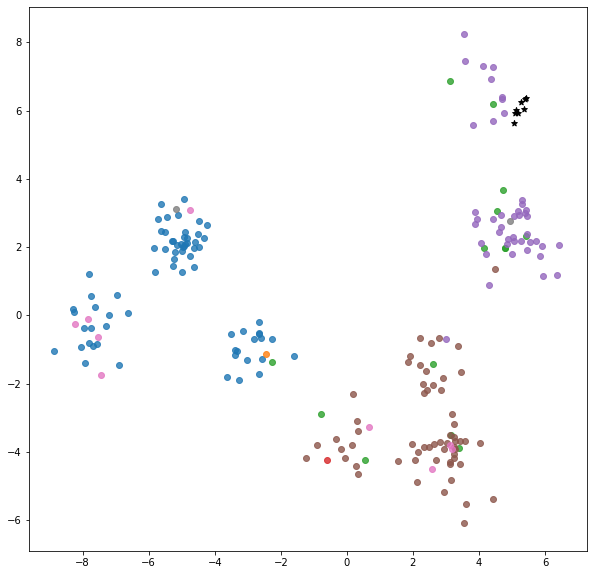

In [68]:
labels_list = list(data.head())
PCA_data, eig_vectors, S_mat, eig_vals = PCA(log_data_arr, 8) 
PCA_plots(PCA_data, eig_vectors, eig_vals, labels_list)
plot_clusters(PCA_data, cluster_labels, centroids)
#TODO add the negative control data stuff

In [62]:
eig_vals

array([2.07921313e+01, 9.64094821e+00, 3.86410433e+00, 3.84533247e+00,
       3.79898611e+00, 3.74399245e+00, 3.73793507e+00, 3.67840714e+00,
       3.65507948e+00, 3.62615007e+00, 3.56105493e+00, 3.55005467e+00,
       3.51243065e+00, 3.49979411e+00, 3.47746041e+00, 3.45595655e+00,
       3.43780432e+00, 3.42869299e+00, 3.39368792e+00, 3.37109850e+00,
       3.35972559e+00, 3.34121915e+00, 3.31753501e+00, 3.28384644e+00,
       3.24024827e+00, 3.23241478e+00, 3.21432946e+00, 3.19648125e+00,
       3.19275497e+00, 3.15405628e+00, 3.14491258e+00, 3.12991594e+00,
       3.11935637e+00, 3.08615599e+00, 3.08023278e+00, 3.07358291e+00,
       3.05573570e+00, 3.03853923e+00, 3.01770921e+00, 3.00403149e+00,
       2.98173236e+00, 2.95110240e+00, 2.93815153e+00, 2.92606118e+00,
       2.91179372e+00, 2.90132970e+00, 2.88457252e+00, 2.86795500e+00,
       2.85906721e+00, 2.83816392e+00, 2.82342430e+00, 2.81762133e+00,
       2.80571787e+00, 2.78040708e+00, 2.77019198e+00, 2.75854353e+00,
      

In [70]:
pca_centroids, pca_cluster_labels, pca_sqr_dist, test = hard_k_means_cluster(8, 
                                                                      np.asarray(PCA_data[:,0:2]), 15)

epoch
epoch
epoch
epoch
epoch
epoch
0.5726174115438668
0.7231637848228831
0.36881262192836595
0.5075324172082963
0.32530134680513756
0.0639570444883557
0.06281958588631319
1.3886283443861944
1.410656793629445
0.058031697906281834
0.7756526191291538
0.2978364009396179
0.03945951920126662
0.5854676272267307
0.16920511575992844
0.22196911778633846
0.39392194690519433
0.8206453902688506
0.035946351704063045
0.06420535189035584
0.3032043713244014
0.6902923103039695
0.39534808941966776
0.013101156458999457
0.9513399692082762
0.8174524925431825
0.8253225034437667
0.057704446977157
0.5023200836280511
0.18779833691662423
0.050399564794948074
0.024360818047849432
1.5460462748194983
0.8535519251406698
0.03425277601072937
0.25679710099718417
0.12365560174841636
1.4993063619108753
8.743651721881958
0.09341853493193404
0.7507910595757622
0.07390555680179975
0.7368372866369187
1.0001372232474508
0.5501124437239
1.3018370292064145
1.4043451125513207
5.537598630292417
0.5112781116975126
0.1358472891368

In [71]:
print(np.unique(pca_cluster_labels))

[0 1 2 3 4 5 6 7]


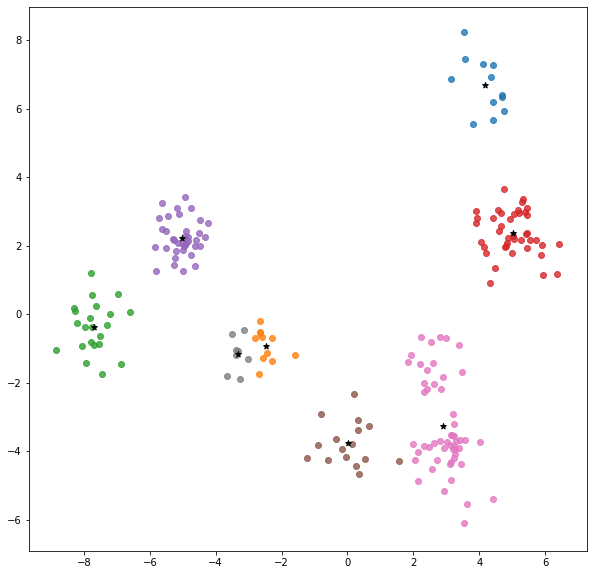

In [72]:
# These clusters are correct sometimes but inconsistent. Need to put a mechanism in the k-means clustering that only
# counts an clster trail if all the centroids are assigned points
plot_clusters(PCA_data[:,0:2], pca_cluster_labels, pca_centroids)


In [73]:
pca_sqr_dist

210.17373898466644

In [74]:
test

[222.98843902253202, 210.17373898466644]

In [14]:
X_star = log_data_arr - np.mean(log_data_arr, axis=0)
U,S,V_T = svd(X_star)
U.shape

(200, 200)

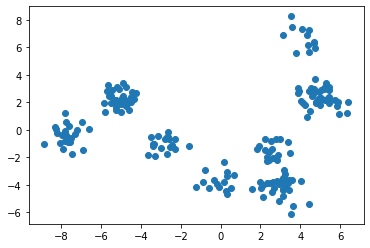

In [15]:
pca = np.matmul(X_star,np.transpose(V_T[0:2,:]))
plt.scatter(pca[:,0], pca[:,1])

__for part three, can fix by either de-noising the data with PCA before clustering or just clustering on the PCA components__

In [16]:
test = distance.euclidean([1,2,3], [4,5,6])
test_2 = np.sqrt((1-4)**2+(2-5))

In [17]:
def kmeans(data, k, thresh):

    
### Initialization ####
    
    dims = data.shape[1]
    # choose random centroid positions 
    idx = np.random.choice(len(data[:,0]), size=k)
    # 3D array to store a set of old and new centroids
    centroid = np.zeros((k,dims,dims))
    # populate the first array with randomly selected positions
    centroid[:,:,0] = data[idx, :]
    # initialize array for centroid assignment
    labels = np.zeros(len(data[:,0]))
    
### EM steps until convergence ###
    c = 0
    diff = np.inf 
    # 1. Expectation step: calculate distances and assign points to centroids
    while diff > thresh:                 
        for i in range(len(data[:,0])):
            # for each point, calculate its distances to all the centroids
            euc_dist = np.sqrt(((centroid[:,:,0] - data[i,:])**2).sum(axis=1))
            # assign it to the nearest centroid
            labels[i] = np.argmin(euc_dist)
            #print(labels)

        # 2. Maximization step: update centroids 

        # copy old centroid positions over to the second array to use later for convergence
        # calculation
        centroid[:,:,1] = centroid[:,:,0]

        # Loop through centroids recalculating their new positions
        for j in range(k):
            centroid_idx = np.where(labels==j)[0]
            if centroid_idx.size != 0:
                # the new centroid position is just the average of the positions of the points
                # that belong to it (since there is no weighting)
                centroid[j,:,0] = data[centroid_idx, :].mean(axis=0)
            else: 
                print('error') # if cluster is empty
                centroid[j,:,0] = data[np.random.choice(len(data[:,0]),size=1), :] 

            
        # Check for convergence using mean squared error
        diff = ((centroid[:,:,0] - centroid[:,:,1]) ** 2).mean()
        # keep track of the number of iterations
        c += 1
        print('Round# : ', c, '\n', 'Difference: ', diff)
        
                      #if verbose == 2:
            #print('iteration {}, err = {}'.format(it, err))
        
        # If we reached convergence, calculate the total distance and break out of the loop
    if diff <= thresh:
        Dc = 0
        for j in range(k):
            centroid_idx = np.where(labels==j)[0]
            # for cluster j, find distance of each point from the centroid
            clust_dist = ((data[centroid_idx,:] - centroid[j,:,0])**2).sum(axis=1)
            Dc += clust_dist.sum()
    print('Algorithm converged at total Dc ', Dc)
    return labels, centroid[:,:,0], Dc

In [18]:
labels, centroid, Dc = kmeans(log_data_arr, 8, 10**(-6))
# plot_clusters(PCA_data[:,0:2], labels, centroids)

Round# :  1 
 Difference:  0.19678591808154028
Round# :  2 
 Difference:  0.00036066919703931237
Round# :  3 
 Difference:  0.00011556876708001698
Round# :  4 
 Difference:  0.00011493226204519605
Round# :  5 
 Difference:  0.00013521289837710947
Round# :  6 
 Difference:  9.142821139740146e-05
Round# :  7 
 Difference:  8.925209217417982e-05
Round# :  8 
 Difference:  5.25299004172846e-05
Round# :  9 
 Difference:  2.7866505143265698e-05
Round# :  10 
 Difference:  0.0
Algorithm converged at total Dc  87717.71616342853


In [19]:
print(centroids[1,0:2])

[5.42495002 6.35784227]
